In [1]:
from sklearn.datasets import make_classification
import numpy as np
#x is the input y is the output columns
X, y = make_classification(n_samples=50, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=12)


#generating a dataset for classification purpose having 50 samples,two input columns,one useful input,no rebundant data
#two classes with two binary values possible,each class with one cluster,same dataset for 23,distance between the classes 12

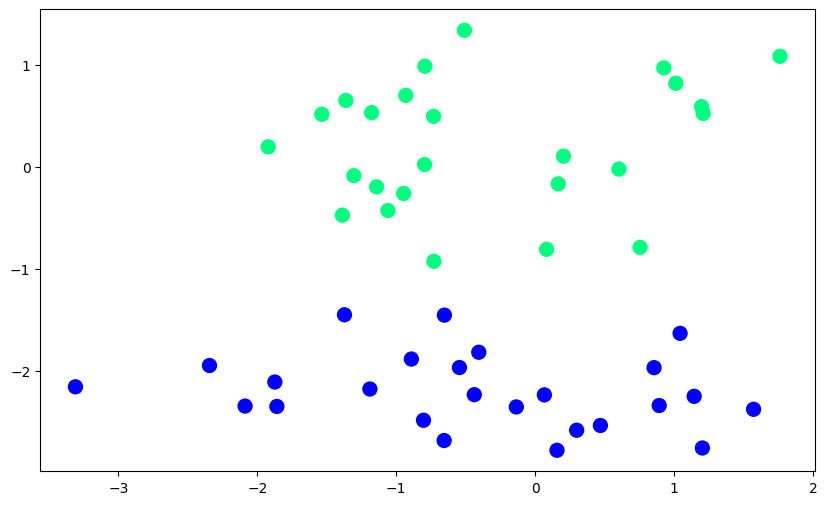

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
print("Shape before insertion:", X.shape)
X = np.insert(X, 0, 1, axis=1)
print("Shape after insertion:", X.shape)


Shape before insertion: (50, 2)
Shape after insertion: (50, 3)


In [4]:

#perceptron trick=In this trick we use the misclassified points and the misclassified lines pulls the line towards themselves
        
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,50)
        predicted_y = step(np.dot(X[j],weights))#wixi w0.1+w1x1+w2x2=0
        #wixi>0=positive 
        #wixi<0=negative
        weights = weights + lr*(y[j]-predicted_y)*X[j]
        
        
    return weights[0],weights[1:]
    


In [5]:
def step(z):
    if(z>=0):
        return 1;
    else:
        return 0;
    

In [6]:
intercept_,coef_ = perceptron(X,y)
print(coef_)


[0.9        0.48422788 1.44556557]


In [7]:
print(intercept_)


0.9


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])


In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

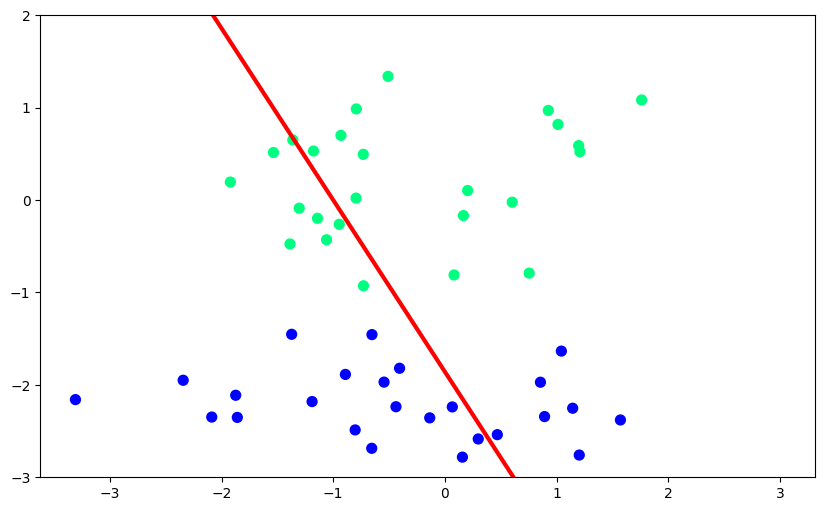

In [10]:
X, y = make_classification(n_samples=50, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=12)

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.ylim(-3,2)

(-3.0, 2.0)

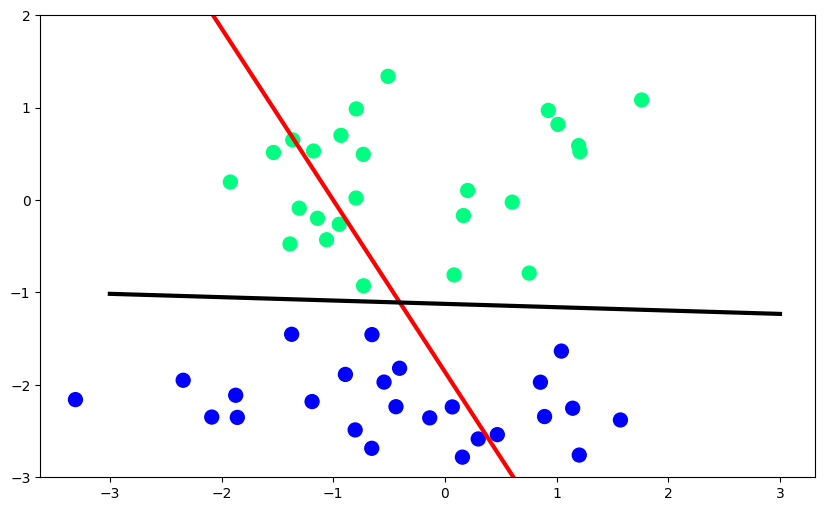

In [11]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [12]:
# There is a vast difference between the perceptron and standard logisitc regression.

In [13]:
#sigmoid function

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,50)
        predicted_y = sigmoid(np.dot(X[j],weights))#wixi w0.1+w1x1+w2x2=0
        #wixi>0=positive 
        #wixi<0=negative
        weights = weights + lr*(y[j]-predicted_y)*X[j]
        
        
    return weights[0],weights[1:]
    


In [15]:
#we use sigmoid function here inplace of step as we need value between 0<y<1
def sigmoid(z):
     return 1/(1 + np.exp(-z))
    

In [16]:
intercept_,coef_ = perceptron(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

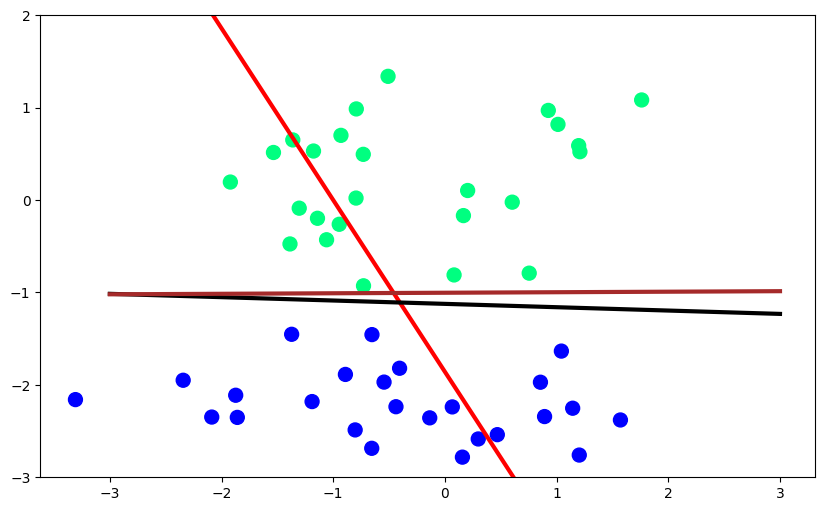

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)#line from perceptron algorithm
plt.plot(x_input1,y_input1,color='black',linewidth=3)#line from logistic regression
plt.plot(x_input2,y_input2,color='brown',linewidth=3)#line from signmoid function
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [19]:
#You can see the vast change after using sigmoid function but still our models line is a bit off than the standard logistic regression line
#so we add log loss function and gradient descent to make it better

In [20]:
#Gradient descent
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [22]:
coef_,intercept_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])


In [23]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input1 + b

(-3.0, 2.0)

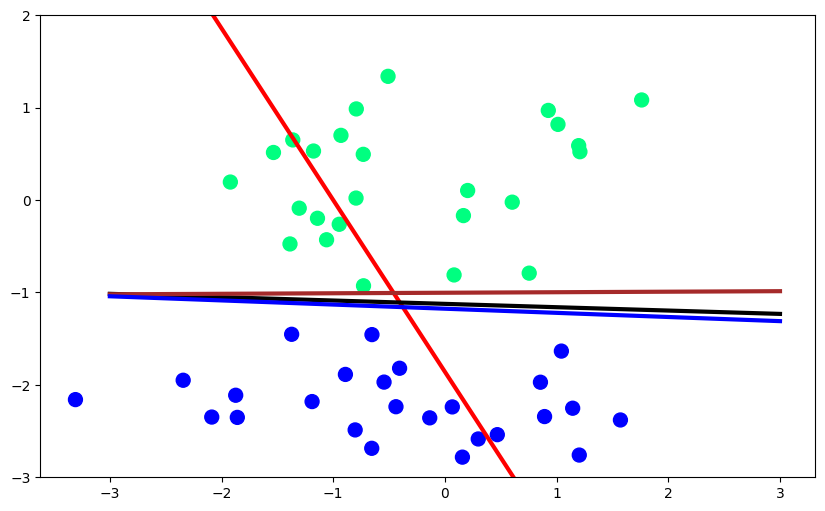

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.plot(x_input3,y_input3,color='blue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)

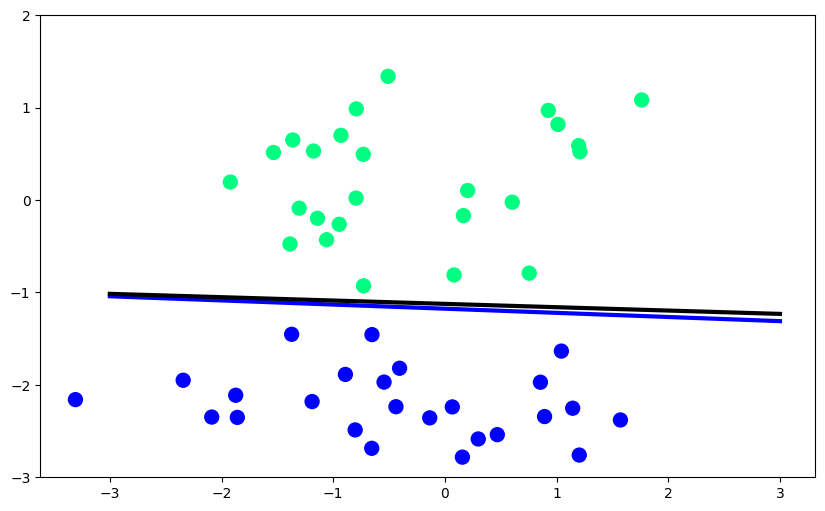

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input3,y_input3,color='blue',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [26]:
#you can see the gradient descent line and logsitic regression line is not so different.